In [56]:
import pandas as pd
import numpy as np
from tesser import sr
from tesser import util
from scipy.stats import linregress
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
%matplotlib inline

def get_coordinates (array, item):
    num_rows = array.shape[0]
    num_columns = array.shape[1]
    for row_num in range(num_rows):
        for column_num in range(num_columns):
            if array[row_num][column_num] == item:
                return (row_num, column_num)
    
def get_grid_dist (coord1, coord2):
    return ((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)**.5
    


final_graph = np.array(np.loadtxt ('/Users/Zhonghou/Desktop/102_FinalGraph.txt'))
euclid_matrix = []
state_coords = []
for state in range(1, 22):
    state_coords.append(get_coordinates(final_graph, state))
for state1 in range (21):
    row = []
    for state2 in range (21):
        coord1 = state_coords[state1]
        coord2 = state_coords[state2]
        row.append (get_grid_dist (coord1, coord2))
    euclid_matrix.append(row)

euclid_matrix = np.array(euclid_matrix)

df = util.load_struct('/Users/Zhonghou/Desktop/', 102)

SR_matrices = sr.explore_runs (df, 'persist', 0, .1)
SR1, SR2 = SR_matrices[(1,5)], SR_matrices[(2,5)]

euclid_matrix0 = np.matrix.flatten(euclid_matrix)
SR10 = np.matrix.flatten(SR1)
SR20 = np.matrix.flatten(SR2)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(SR10,euclid_matrix0)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(SR20, euclid_matrix0)

print ("SR1:")
print("R value:", r_value1**2)

print ("SR2:")
print("R value:", r_value2**2)

print ("Fitted distance:")
yhat1 = slope1*SR1 + intercept1
yhat2 = slope2*SR2 + intercept2


SR1:
R value: 0.1128101947341352
SR2:
R value: 0.11281069098383978
Fitted distance:


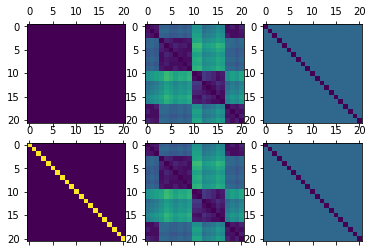

In [57]:
fig, ax = plt.subplots(2, 3)
vec1 = sd.squareform(SR1, checks=False)
ax[0][0].matshow(SR1, vmin=np.min(vec1), vmax=np.max(vec1))
ax[0][1].matshow(euclid_matrix, vmin=0, vmax=30)
ax[0][2].matshow(yhat1, vmin=0, vmax=30)

ax[1][0].matshow(SR2)
ax[1][1].matshow(euclid_matrix, vmin=0, vmax=30)
ax[1][2].matshow(yhat2, vmin=0, vmax=30)

In [53]:
print(np.max(euclid_matrix))

20.591260281974


20.591260281974